![example image](./000000269314.jpg)

Countless hours of footage have been filmed by hidden cameras for a wildlife documentary. The footage needs to be examined to find out when animals have been captured in the footage. Classifying all captured images based on whether the feature animals could save weeks of work. 

You are part of a data science team involved in making this documentary, and your task is to prepare an image processing pipeline. The pipeline will augment existing datasets of images featuring animals so that an object-detection model can be trained and used on the footage.

Data augmentation involves creating variations of the original images through transformations like rotation, scaling, and equalizing to increase the training dataset's diversity and models' robustness. This technique enriches the dataset without collecting more data, helping models generalize better to new, unseen images.

In this project, you will perform image processing operations on five images featuring animals. The output of this project will be a pipeline transforming images to produce augmented datasets.

## Data

The `COCO` (Common Objects in Context) dataset is a dataset designed for training and evaluating computer vision models on a variety of tasks, including object detection. Five images featuring animals have been downloaded from this dataset. 

The list `file_names` is already available and contains the names of the image files available in the current directory.

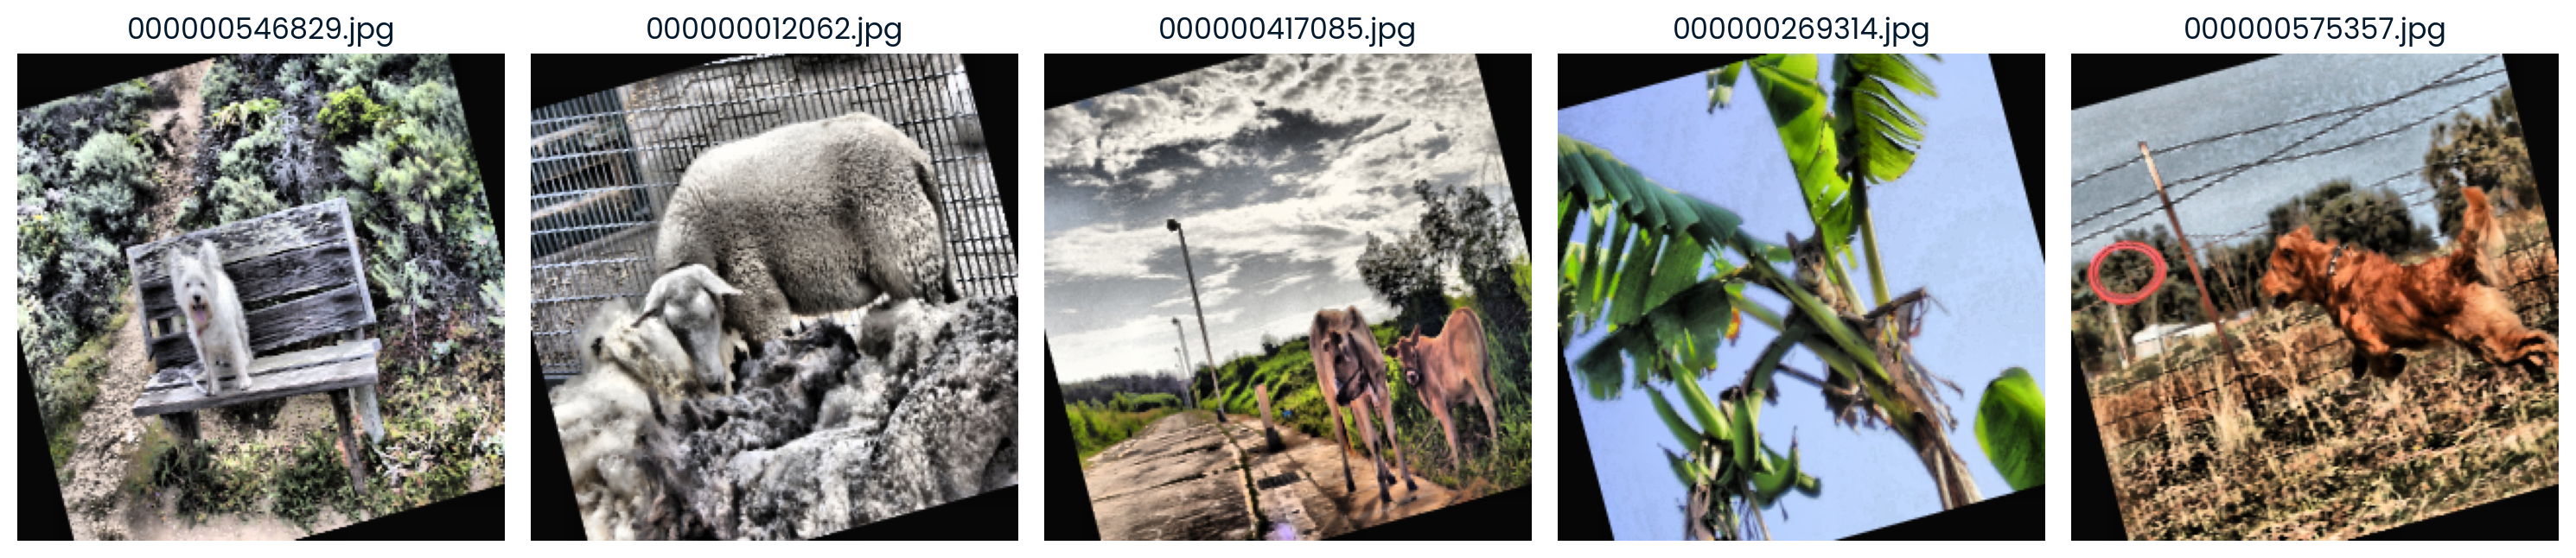

In [4]:
# Import Matplotlib to read and display images 
import matplotlib.pyplot as plt
# Import the necessary modules from scikit-image for image transformation, and exposure adjustment
from skimage.transform import resize, rotate 
from skimage.exposure import equalize_adapthist

# List of filenames for the images to be processed
file_names = ["000000546829.jpg","000000012062.jpg","000000417085.jpg","000000269314.jpg","000000575357.jpg"]

# Define the image processing function
def image_processing(file_names, size=(250, 250), rotation_angle=0, equalization_clip_limit=None):
    transformed_images = []

    for file in file_names:
        # Step 1: Import image
        image = imread(file)

        # Step 2: Resize
        image_resized = resize(image, size, anti_aliasing=True)

        # Step 3: Rotate
        image_rotated = rotate(image_resized, rotation_angle)

        # Step 4: Equalize (optional)
        if equalization_clip_limit is not None:
            image_equalized = equalize_adapthist(image_rotated, clip_limit=equalization_clip_limit)
            transformed_images.append(image_equalized)
        else:
            transformed_images.append(image_rotated)

    return transformed_images

# Apply the transformation function
transformed_images = image_processing(
    file_names,
    size=(250, 250),
    rotation_angle=15,
    equalization_clip_limit=0.03
)

# Visualize the transformed images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, img, title in zip(axes, transformed_images, file_names):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")
plt.tight_layout()
plt.show()
